In [1]:
import sys
sys.path.append("../HiTS_simulations/image_simulation/")
import numpy as np
import matplotlib.pyplot as plt
from Galaxies import GalaxyImages
from MagCounts import Count2Mag
from psf_sampler import PSFSampler

In [13]:
save_path = "chapter3_plots/"
plot_fontsize = 18
plot_figsize = (15, 6)

# Galaxies

In [3]:
# distr_path = "/home/rodrigo/supernova_detection/gal_mags_dev_exp_z_all_Filter_rodrigocd.csv"
#distr_path = "/home/rodrigo/supernovae_detection/galaxies/gal_mags_dev_exp_z_all_Filter_rodrigocd.csv"
galaxies_path = "/home/rodrigo/supernovae_detection/galaxies_guille/gal_mags_dev_exp_z_all_Filter_rodrigocd.csv"
pixel_size = 0.187
stamp_size = (21, 21)
image_size = (60, 60)
bands = ["g", "r", "i", "z"] # ["Blue", "Yellow-Orange", "Red", "Brown"]
galaxies_gen = GalaxyImages(distr_path=galaxies_path,
                            pixel_size=pixel_size,
                            stamp_size=stamp_size,
                            image_size=image_size,
                            n_integrations=20,
                            bands=bands,
                            load_all_data=True)

t_exp = [225.0, 225.0, 225.0, 225.0]
seeing = [4.3, 4.0, 5.0, 3.8]
airmass = [1.1, 0.9, 1.8, 0.5]
zero_points = [26.59, 26.59, 26.59, 26.59]

frame = galaxies_gen.distr_dataframe
print(frame.shape)
print(frame[frame["expRad_z"] == 0].shape)

redshift = 0.6

(773028, 47)
(0, 47)


In [54]:
redshift = []
galaxies_gen.sample_galaxy()
parameters_1 = galaxies_gen.return_params()

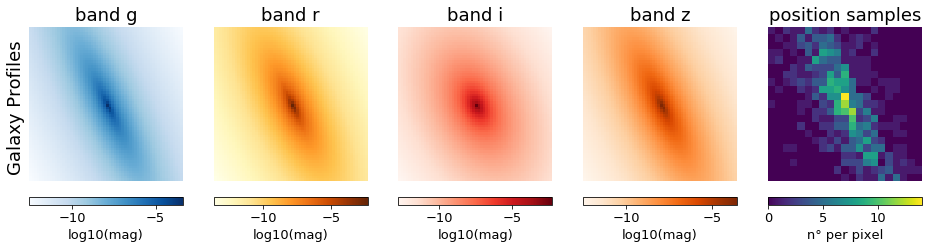

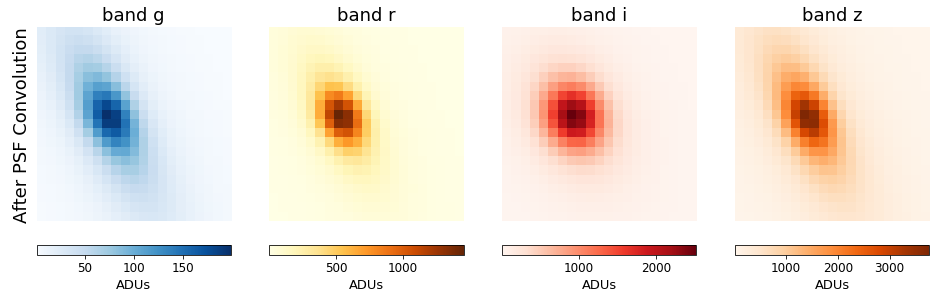

In [58]:
f, ax = plt.subplots(1,5,figsize=(16,6))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    s.append(ax[i].imshow(np.log(galaxies_gen.profile[band]["norm_image"]), interpolation="none", cmap=colors[i]))
    cbar = f.colorbar(s[-1], orientation="horizontal", ax=ax[i], pad=0.05)
    cbar.ax.tick_params(labelsize=plot_fontsize-5)
    cbar.ax.set_xlabel("log10(mag)", fontsize=plot_fontsize-5)
    ax[i].set_title("band "+band, fontsize=plot_fontsize)
    ax[i].set_axis_off()
ax[0].text(-9, 10, "Galaxy Profiles", rotation=90, fontsize=plot_fontsize)
histogram = np.zeros(shape=image_size)
pos = galaxies_gen.sample_position_galaxy(n_samples=1000)
for p in pos:
    histogram[p[0],p[1]] += 1
s5 = ax[-1].imshow(histogram[20:41, 20:41], interpolation="none")
ax[-1].set_title("position samples", fontsize=plot_fontsize)
ax[-1].set_axis_off()
#s2 = ax2.imshow(histogram, interpolation="none")   
cbar = f.colorbar(s5, orientation="horizontal", ax=ax[-1], pad=0.05)
cbar.ax.set_xlabel("n° per pixel", fontsize=plot_fontsize-5)
cbar.ax.tick_params(labelsize=plot_fontsize-5)
#print(np.sum(galaxies_gen.norm_img))
plt.savefig(save_path+"galaxies_mag.pdf", bbox_inches = 'tight')
plt.show()

f, ax = plt.subplots(1,4,figsize=(16,9))

s = []
colors = ["Blues", "YlOrBr", "Reds", "Oranges"]

for i, band in enumerate(bands):
    stamp = galaxies_gen.generate_galaxy_stamp(band, t_exp[i], seeing[i], airmass[i], 
                                               zero_point=zero_points[i], airmass_term=0.15)
    s.append(ax[i].imshow(stamp, interpolation="none", cmap=colors[i]))
    cbar = f.colorbar(s[-1], orientation="horizontal", ax=ax[i],pad=0.05)
    cbar.ax.tick_params(labelsize=plot_fontsize-6)
    cbar.ax.set_xlabel("ADUs", fontsize=plot_fontsize-5)
    ax[i].set_title("band "+band, fontsize=plot_fontsize)
    ax[i].set_axis_off()
    #ax[i].set_ylabel("ADUs", fontsize=plot_fontsize)
    
ax[0].text(-3, 1, 'After PSF Convolution', rotation=90, fontsize=plot_fontsize)
plt.savefig(save_path+"galaxies_adu.pdf", bbox_inches = 'tight')
plt.show()